In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

## Load the data

In [2]:
# Abalone dataset https://archive.ics.uci.edu/ml/datasets/abalone
df_abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv", header=None, 
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

df_abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [3]:
df_abalone_train.shape

(3320, 8)

The nominal task for this dataset is to predict the age from the other measurements, so separate the features and labels for training:

In [4]:
abalone_features = df_abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [5]:
# Pack the features into a single NumPy array
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [29]:
abalone_features.shape

(3320, 7)

## Modeling

Basic with no preprocessing

In [23]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])


abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

In [24]:
abalone_model.build(input_shape=abalone_features.shape)

In [25]:
abalone_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (3320, 64)                512       
_________________________________________________________________
dense_8 (Dense)              (3320, 1)                 65        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [26]:
# abalone_model.add(layers.Dense(32))

In [28]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 2ms/step - loss: 60.4479
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 11.6327
Epoch 3/10
104/104 [==============================] - 0s 4ms/step - loss: 8.6582
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 8.1506
Epoch 5/10
104/104 [==============================] - 0s 3ms/step - loss: 7.7012
Epoch 6/10
104/104 [==============================] - 0s 3ms/step - loss: 7.3497
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 7.0853
Epoch 8/10
104/104 [==============================] - 0s 3ms/step - loss: 6.8817
Epoch 9/10
104/104 [==============================] - 0s 3ms/step - loss: 6.7366
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 6.6304


## Preprocessing

It's good practice to normalize the inputs to your model. The `experimental.preprocessing` layers provide a convenient way to build this normalization into your model.

In [31]:
normalize = preprocessing.Normalization()

**Note: Only use your training data to .adapt() preprocessing layers. Do not use your validation or test data.**

In [33]:
normalize.adapt(abalone_features)

In [34]:
# use the normalization layer in the model
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 3ms/step - loss: 92.3497
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 53.1310
Epoch 3/10
104/104 [==============================] - 0s 3ms/step - loss: 16.6061
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 5.9505
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 5.1413
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0421
Epoch 7/10
104/104 [==============================] - 0s 4ms/step - loss: 5.0105
Epoch 8/10
104/104 [==============================] - 0s 3ms/step - loss: 5.0145A: 0s - loss: 4
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9709
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9860


We use a loss function to determine how far the predicted values deviate from the actual values in the training data. ... We change the model weights to make the loss minimum, and that is what training is all about

## Classification Example

In [39]:
mnist = tf.keras.datasets.mnist


In [40]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [53]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_history = model.fit(x_train, 
                             y_train, 
                             epochs=5,
                            validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3244 - accuracy: 0.9056 - val_loss: 0.1613 - val_accuracy: 0.9540
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1550 - accuracy: 0.9554 - val_loss: 0.1114 - val_accuracy: 0.9659
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1144 - accuracy: 0.9651 - val_loss: 0.0978 - val_accuracy: 0.9705
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0933 - accuracy: 0.9716 - val_loss: 0.0871 - val_accuracy: 0.9737
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0790 - accuracy: 0.9757 - val_loss: 0.0803 - val_accuracy: 0.9755


In [60]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Evaluate returns the loss value and metrics values for the model.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0777 - accuracy: 0.9780


[0.07771231979131699, 0.9779999852180481]

You can learn a lot about neural networks and deep learning models by observing their performance over time during training.

In [55]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

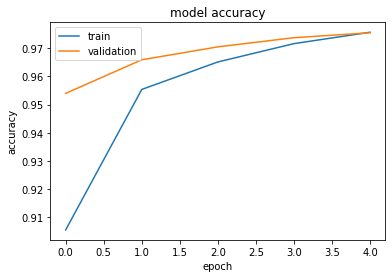

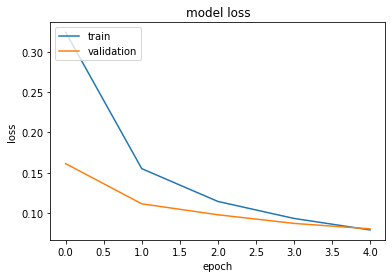

In [58]:
# summarize history for accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()